In [20]:
import data
import transformers
import os

# change cwd to project root
if os.path.split(os.getcwd())[-1] == "src":
    os.chdir("..")

NER, SENTIMENT_TOPIC = data.load()

sentences = SENTIMENT_TOPIC["sentence"].to_list()
true_labels = SENTIMENT_TOPIC["sentiment"].to_list()

In [21]:

classifier = transformers.pipeline("sentiment-analysis", model="finiteautomata/bertweet-base-sentiment-analysis")
results = classifier(sentences)

Device set to use mps:0


In [24]:
label_mapping = {
    "POS": "positive",
    "NEG": "negative",
    "NEU": "neutral",
}

y_true = []
y_pred = []

correct_predictions = 0
for i, result in enumerate(results):
    predicted_label = result["label"]
    mapped_label = label_mapping.get(predicted_label)

    true_label = true_labels[i]
    print(f"Sentence {i + 1}: {sentences[i]}")
    print(f"P: {mapped_label}, T: {true_label}")

    print(mapped_label, true_label)

    y_true.append(true_label)
    y_pred.append(mapped_label)

    if mapped_label == true_label:
        correct_predictions += 1


Sentence 1: The stadium was alive with the roar of the crowd after that incredible win.
P: positive, T: positive
positive positive
Sentence 2: That last-minute goal had me jumping out of my seat—what an unbelievable finish!
P: positive, T: positive
positive positive
Sentence 3: I couldn’t put the book down; it swept me into a whole new world.
P: positive, T: positive
positive positive
Sentence 4: The story had its moments, though some parts felt like they dragged on a bit.
P: neutral, T: neutral
neutral neutral
Sentence 5: I enjoyed the way the timelines shifted, even if it got a little confusing sometimes.
P: positive, T: neutral
positive neutral
Sentence 6: Every time I watch this movie, I notice something new—it really grows on you.
P: positive, T: positive
positive positive
Sentence 7: The movie was a wild ride from start to finish; I was on the edge of my seat the entire time.
P: positive, T: positive
positive positive
Sentence 8: Honestly, the team just fell apart in the second h

Correct prediction proportion: 0.8888888888888888

Accuracy: 0.8888888888888888


Classification Report:

              precision    recall  f1-score   support

    negative      1.000     1.000     1.000         6
     neutral      1.000     0.667     0.800         6
    positive      0.750     1.000     0.857         6

    accuracy                          0.889        18
   macro avg      0.917     0.889     0.886        18
weighted avg      0.917     0.889     0.886        18



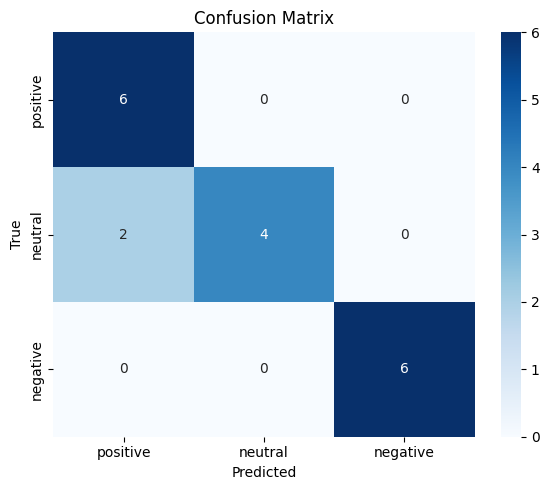

In [25]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

print(f"Correct prediction proportion: {correct_predictions / len(results)}")


acc = accuracy_score(y_true, y_pred)
print(f"\nAccuracy: {acc}\n")

# Precision, Recall, F1, Support
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, digits=3))


cm = confusion_matrix(y_true, y_pred, labels=["positive", "neutral", "negative"])
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["positive", "neutral", "negative"],
            yticklabels=["positive", "neutral", "negative"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()
